In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

READ IN FILE

In [11]:
df = pd.read_excel('../data/FY2010_20_Active_Component_Accessions_Non_PriorSvc_Census_Region.xlsx')

In [12]:
df

,division,year,dod_male,dod_male_per,dod_female,dod_female_per,dod_total,dod_total_per,gdppc,civ_male_per,civ_female_per,civ_total_per
0,NORTHEAST REGION,2010,16768,12.900000,3139,12.100000,19907,12.700000,57074.685716,18.20,18.30,18.20
1,New England Division,2010,4544,3.500000,705,2.700000,5249,3.400000,58038.261498,4.70,4.70,4.70
2,Middle Atlantic Division,2010,12224,9.400000,2434,9.400000,14658,9.400000,56733.873756,13.50,13.60,13.60
3,NORTH CENTRAL REGION,2010,27041,20.800000,4601,17.700000,31642,20.200000,45776.871746,22.40,22.30,22.30
4,East North Central Division,2010,18686,14.300000,3221,12.400000,21907,14.000000,45133.884500,15.60,15.60,15.60
...,...,...,...,...,...,...,...,...,...,...,...,...
146,West South Central Division,2020,18056,15.240000,4319,15.372842,22375,15.267202,60305.367844,12.83,13.33,10.08
147,WEST REGION,2020,28978,24.462059,6772,24.103933,35750,24.393406,69650.761866,24.87,23.69,24.28
148,Mountain Division,2020,9680,8.171466,2332,8.300409,12012,8.196184,57141.732470,8.42,7.43,7.93
149,Pacific Division,2020,19298,16.290594,4440,15.803524,23738,16.197222,75477.887476,16.45,16.26,16.35


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   division        151 non-null    object 
 1   year            151 non-null    int64  
 2   dod_male        151 non-null    int64  
 3    dod_male_per   151 non-null    float64
 4   dod_female      151 non-null    int64  
 5   dod_female_per  151 non-null    float64
 6   dod_total       151 non-null    int64  
 7   dod_total_per   151 non-null    float64
 8   gdppc           151 non-null    float64
 9   civ_male_per    150 non-null    float64
 10  civ_female_per  150 non-null    float64
 11  civ_total_per   150 non-null    float64
dtypes: float64(7), int64(4), object(1)
memory usage: 14.3+ KB


TRY TO EXAMINE GDPPC ACROSS TIME FOR REGIONS

In [14]:
df.gdppc.round()

0      57075.0
1      58038.0
2      56734.0
3      45777.0
4      45134.0
        ...   
146    60305.0
147    69651.0
148    57142.0
149    75478.0
150    64724.0
Name: gdppc, Length: 151, dtype: float64

In [15]:
df.gdppc = df.gdppc.round()
df.head(2)

,division,year,dod_male,dod_male_per,dod_female,dod_female_per,dod_total,dod_total_per,gdppc,civ_male_per,civ_female_per,civ_total_per
0,NORTHEAST REGION,2010,16768,12.9,3139,12.1,19907,12.7,57075.0,18.2,18.3,18.2
1,New England Division,2010,4544,3.5,705,2.7,5249,3.4,58038.0,4.7,4.7,4.7


In [16]:
df[['division', 'year', 'gdppc']]

,division,year,gdppc
0,NORTHEAST REGION,2010,57075.0
1,New England Division,2010,58038.0
2,Middle Atlantic Division,2010,56734.0
3,NORTH CENTRAL REGION,2010,45777.0
4,East North Central Division,2010,45134.0
...,...,...,...
146,West South Central Division,2020,60305.0
147,WEST REGION,2020,69651.0
148,Mountain Division,2020,57142.0
149,Pacific Division,2020,75478.0


Q1Are there regions/divisions/states where the proportion of volunteers for the US Armed Forces exceeds the population percentages 
for eligible individuals aged 18-24?

In [22]:
##I want all the rows where the column 'division' has 'REGION' in it
#https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/
#Disney checkpoint Q15
df[df['division'].str.contains('REGION')]

,division,year,dod_male,dod_male_per,dod_female,dod_female_per,dod_total,dod_total_per,gdppc,civ_male_per,civ_female_per,civ_total_per
0,NORTHEAST REGION,2010,16768,12.900000,3139,12.100000,19907,12.700000,57075.0,18.20,18.30,18.20
3,NORTH CENTRAL REGION,2010,27041,20.800000,4601,17.700000,31642,20.200000,45777.0,22.40,22.30,22.30
6,SOUTH REGION,2010,55501,42.600000,12309,47.300000,67810,43.400000,44793.0,35.70,35.90,35.80
10,WEST REGION,2010,30964,23.800000,5966,22.900000,36930,23.600000,49554.0,23.80,23.50,23.70
14,NORTHEAST REGION,2011,16178,13.000000,3025,12.100000,19203,12.800000,57985.0,18.20,18.50,18.40
17,NORTH CENTRAL REGION,2011,25948,20.800000,4375,17.400000,30323,20.200000,47655.0,21.80,22.20,22.00
20,SOUTH REGION,2011,52990,42.500000,11956,47.600000,64946,43.300000,46176.0,35.80,36.00,35.90
24,WEST REGION,2011,29708,23.800000,5743,22.900000,35451,23.600000,50914.0,24.20,23.30,23.80
28,NORTHEAST REGION,2012,16430,13.100000,2945,12.000000,19375,12.900000,60596.0,18.50,18.40,18.40
31,NORTH CENTRAL REGION,2012,25922,20.600000,4440,18.100000,30362,20.200000,49610.0,21.20,21.80,21.50


In [24]:
df_region = df[df['division'].str.contains('REGION')]
df_region.head(2)

,division,year,dod_male,dod_male_per,dod_female,dod_female_per,dod_total,dod_total_per,gdppc,civ_male_per,civ_female_per,civ_total_per
0,NORTHEAST REGION,2010,16768,12.9,3139,12.1,19907,12.7,57075.0,18.2,18.3,18.2
3,NORTH CENTRAL REGION,2010,27041,20.8,4601,17.7,31642,20.2,45777.0,22.4,22.3,22.3


In [ ]:
#Filter 'df_region' by year

In [25]:
#movies_df = disney.loc[disney['type'] == 'Movie']
df_region.loc[df_region['year'] == 2010]

,division,year,dod_male,dod_male_per,dod_female,dod_female_per,dod_total,dod_total_per,gdppc,civ_male_per,civ_female_per,civ_total_per
0,NORTHEAST REGION,2010,16768,12.9,3139,12.1,19907,12.7,57075.0,18.2,18.3,18.2
3,NORTH CENTRAL REGION,2010,27041,20.8,4601,17.7,31642,20.2,45777.0,22.4,22.3,22.3
6,SOUTH REGION,2010,55501,42.6,12309,47.3,67810,43.4,44793.0,35.7,35.9,35.8
10,WEST REGION,2010,30964,23.8,5966,22.9,36930,23.6,49554.0,23.8,23.5,23.7


In [26]:
df_region_10 = df_region.loc[df_region['year'] == 2010]

In [ ]:
#Compare dod_total_per with civ_total_per to see which is higher.
#Plot dod_total_per with civ_total_per by year 

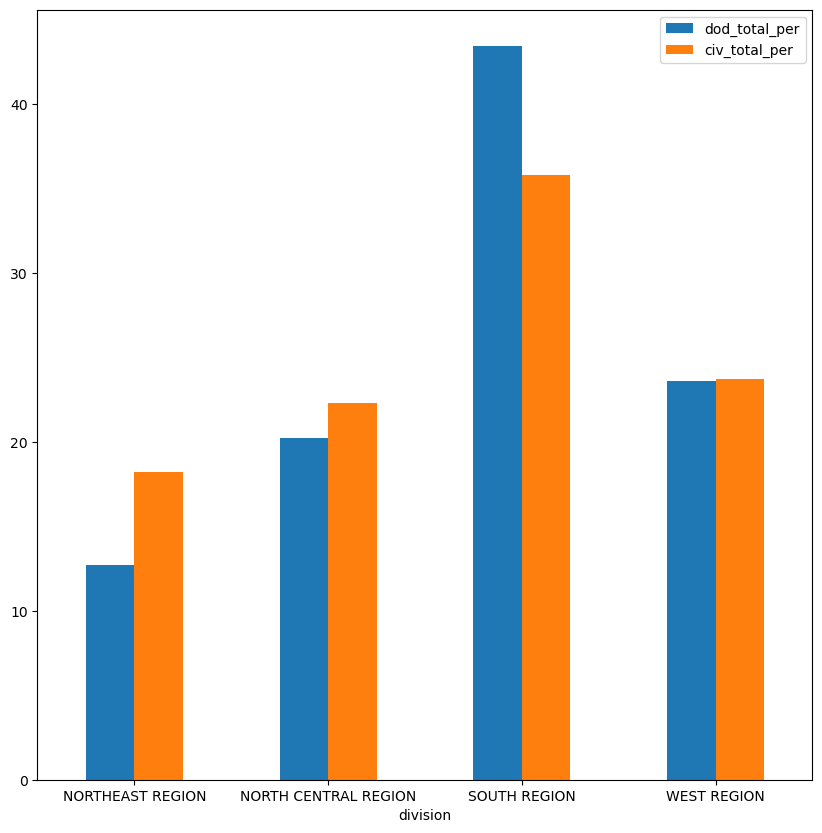

In [37]:
#https://www.geeksforgeeks.org/how-to-plot-multiple-data-columns-in-a-dataframe/
df_region_10 = pd.DataFrame(df_region_10, columns=['division', 'dod_total_per', 'civ_total_per'])

df_region_10.plot(x='division', y=['dod_total_per', 'civ_total_per'], kind = 'bar', figsize = (10,10))

plt.xticks(rotation = 0)

plt.show()              

In [28]:
plt.bar(df_region_10['division'], df_region_10['dod_total_per', 'civ_total_per'], color ='pink', 
        width = 0.4)

plt.xlabel("US Census Regions")
plt.ylabel("Percent")
plt.title("Disney Movie Ratings Top 5 Categories")
plt.show()

KeyError: ('dod_total_per', 'civ_total_per')